### Bringing Trend Filtering into the Continous Domain

Recall Trend Filtering refers to the discrete optimization problem of 

$$ \min_{\mathbf{\beta }} \sum_{i=1}^{n} \left( y_{i}-\beta_{0}-\sum_{j=1}^{p} \beta_{j} x_{i j} \right)^{2}+\lambda \sum_{j=1}^{p} \left| \beta_{j}-\beta_{j-1} \right| $$

where $\lambda$ is a tuning parameter. The goal is to find a sequence of $\beta_j$ that minimizes the sum of squared residuals while also minimizing the sum of absolute differences between consecutive $\beta_j$. This is a convex optimization problem and can be solved using standard convex optimization techniques.

The solution is a discrete vector. To bring into the continous domain we utilize the falling factorial basis first suggested by [1]. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import sys

sys.path.append("../../")
sys.path.append("../../basis/")
sys.path.append("../../estimators")
sys.path.append("../../estimators/trend_filtering")
sys.path.append("../../estimators/trend_filtering/helpers")
sys.path.append("../../model_selection")


### basis functions
from continous_tf import Continous_TF
from falling_factorial_gen import Falling_Factorial_Basis

### model_selection
from cross_validation import K_Fold_Cross_Validation
from cv_base_estimator import cv_base_estimator

### estimators
from trend_filter import Trend_Filter

### helpers
from difference_matrix import Difference_Matrix


### Generate Noisy Data

In [ ]:
x=np.linspace(0, 2 * np.pi, 500)
noisy_signal =np.sin(2*x) + np.random.normal(0, 0.25, 500)+10

plt.plot(noisy_signal)

### Sample TF Problem solved with Primal Dual Interior Point Method

Below we solve the TF problem for a sample of data. It utilizes a primal dual interior point method originally suggested by Boyd.

An exponentially spaced grid is used for potential lambda values. 1-fold cross validation is used to select the best lambda value. 

In [ ]:
tf=Trend_Filter(x=x,y=noisy_signal,k=1,method='primal_dual')


cv_base_estimator(tf)

500 3
166
Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.0037525037302282016
Performing cross validation for lambda = 0.037525037302282016
Performing cross validation for lambda = 0.37525037302282016
Performing cross validation for lambda = 3.752503730228202
Performing cross validation for lambda = 37.525037302282016
Performing  1 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.0037525037302282016
Performing cross validation for lambda = 0.037525037302282016
Performing cross validation for lambda = 0.37525037302282016
Performing cross validation for lambda = 3.752503730228202
Performing cross validation for lambda = 37.525037302282016
Performing  2 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.0037525037302282016
Performing cross validation for lambda = 0.037525037302282016
Performing cross validation for lambda = 0.37525037302282016
Performing cross validation for 

{'lambda_': 3.752503730228202}

### Let's Visualize results

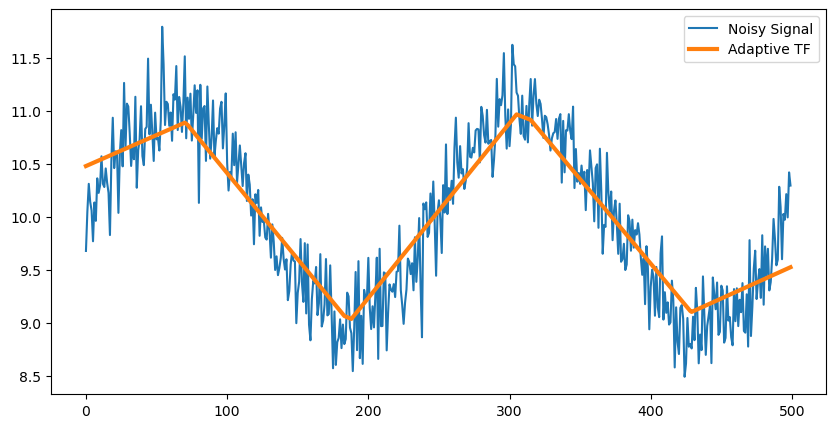

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(tf.y_hat, label="Adaptive TF",lw=3)

ax.legend()


### Same problem solved with ADMM

In [ ]:
tf=Trend_Filter(x=x,y=noisy_signal,k=1,method='admm')

cv_base_estimator(tf)


500 3
166
Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.0037525037302282016
Performing cross validation for lambda = 0.037525037302282016
Performing cross validation for lambda = 0.37525037302282016
Performing cross validation for lambda = 3.752503730228202
Performing cross validation for lambda = 37.525037302282016
Performing  1 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.0037525037302282016
Performing cross validation for lambda = 0.037525037302282016
Performing cross validation for lambda = 0.37525037302282016
Performing cross validation for lambda = 3.752503730228202
Performing cross validation for lambda = 37.525037302282016
Performing  2 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.0037525037302282016
Performing cross validation for lambda = 0.037525037302282016
Performing cross validation for lambda = 0.37525037302282016
Performing cross validation for 

{'lambda_': 0.037525037302282016}

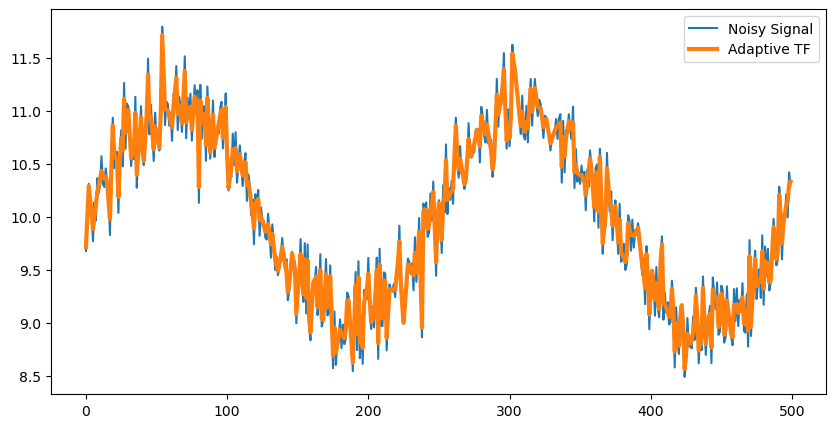

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(tf.y_hat, label="Adaptive TF",lw=3)
ax.legend()

### Construction of Falling Factorial Basis

The falling factorial basis has similar properties to splines and is constructed as follows:

$$ h_{j}(x)=\prod_{i=1}^{j-1} (x-x_l) \quad j=1, \ldots , k+1 $$
$$ h_{k+1+j}(x) = \prod_{i=1}^{k} (x-x_{j+l}) \ 1{x \geq x_{j+k}} \quad j=1 \ldots , n-k-1 $$

such that $h_1(x)=1$

The difference is that the falling factorial basis does not require continuity of derivatives at the knots

In [ ]:
x_tf=tf.y_hat

t=np.arange(1,501)

ffb=Falling_Factorial_Basis(t,1)

print(ffb.h_j_x(np.array([1.5])))

print(f"Shape of h_j_x: {ffb.h_j_x(np.array([1.5])).shape}")


[[1. ]
 [0.5]]
Shape of h_j_x: (2, 1)


In [ ]:
print(ffb.h_k_j_x(np.array([15])))

print(f"Shape of h_k_j_x: {ffb.h_k_j_x(np.array([1.5])).shape}")


[[14.]
 [13.]
 [12.]
 [11.]
 [10.]
 [ 9.]
 [ 8.]
 [ 7.]
 [ 6.]
 [ 5.]
 [ 4.]
 [ 3.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]

### Continous TF Evaluation

In [ ]:
D=tf.D

ctf=Continous_TF(x_tf,D,D.k)

print(f"Number of phi coefficients: {len(ctf.phi)}")

print(f"Phi coefficients: {ctf.phi}")

print(f"Number of theta coefficients: {len(ctf.theta)}")

print(f"Theta coefficients: {ctf.theta}")


Number of phi coefficients: 2
Phi coefficients: [[ 9.71528106]
 [23.48941617]]
Number of theta coefficients: 498
Theta coefficients: [[-1.28704379e+00]
 [-3.29698905e+01]
 [ 2.81764409e-02]
 [ 5.44699049e-02]
 [ 1.95317493e+01]
 [-1.39750017e-01]
 [ 6.16765470e-01]
 [-3.99035713e+00]
 [ 1.84392980e-01]
 [ 1.67700181e-01]
 [-9.29051562e+00]
 [ 1.21245093e+00]
 [ 4.40828670e+00]
 [-6.75349419e+00]
 [-8.82542203e+00]
 [-2.16618270e-01]
 [ 5.11722275e+01]
 [-4.69316807e+00]
 [-5.33828859e+01]
 [ 1.77885811e+01]
 [-5.66501639e-02]
 [-2.39688518e+01]
 [ 5.30756724e+01]
 [-8.15074992e+00]
 [-2.72912297e+01]
 [ 4.80062091e+01]
 [-6.42190254e+01]
 [ 4.14315803e+01]
 [-1.47858095e+01]
 [-1.90634579e+01]
 [ 4.08980169e-02]
 [ 2.17585174e+01]
 [-8.13321739e-02]
 [ 2.23489399e+01]
 [-7.27025913e+01]
 [ 6.09862396e+01]
 [-7.39714522e-02]
 [-2.62738500e-02]
 [-3.74589823e+01]
 [ 1.35793805e+01]
 [ 2.69257273e+01]
 [-8.85390689e-02]
 [ 1.27364579e+01]
 [-6.29514332e+01]
 [ 3.41489280e+01]
 [-1.3366504

In [ ]:
x_tf[0]-x_tf[1]

array([-0.29576825])

In [ ]:
ctf.h_j_x(np.array([105.55]))


array([[  1.  ],
       [105.55]])

### Let's Visualize the Coefficients

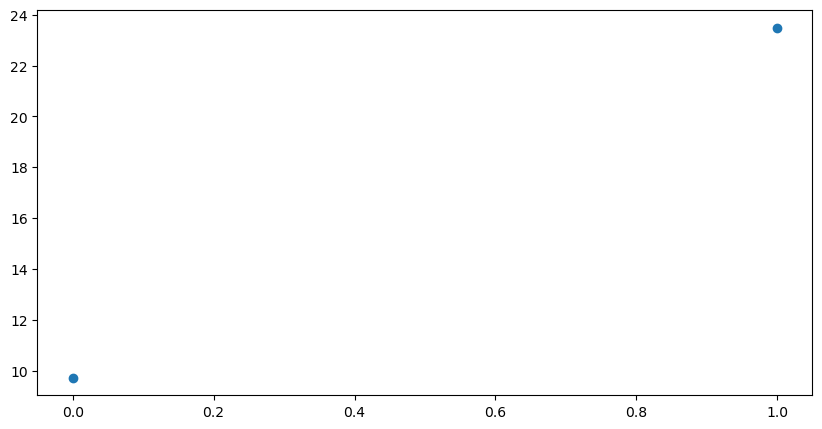

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(np.arange(0,len(ctf.phi)),ctf.phi,label="phi")

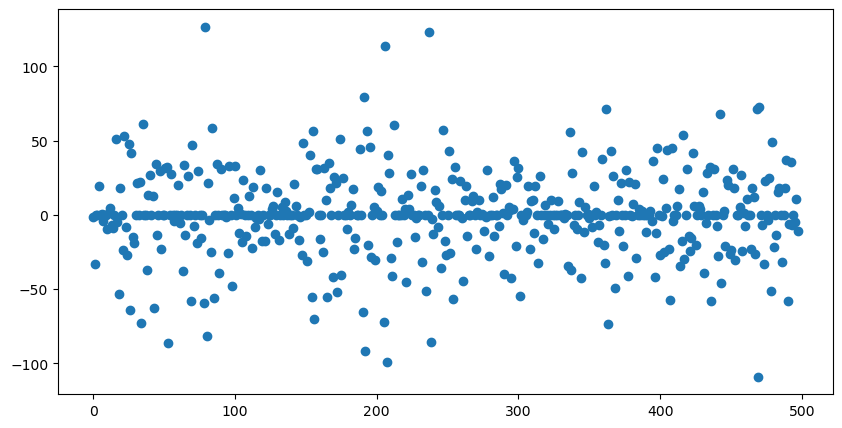

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(np.arange(0,len(ctf.theta)),ctf.theta,label="theta")


### Continous TF Evaluation

First examine the Time Difference Matrix. This is just the standard difference matrix as we are equally spaced time

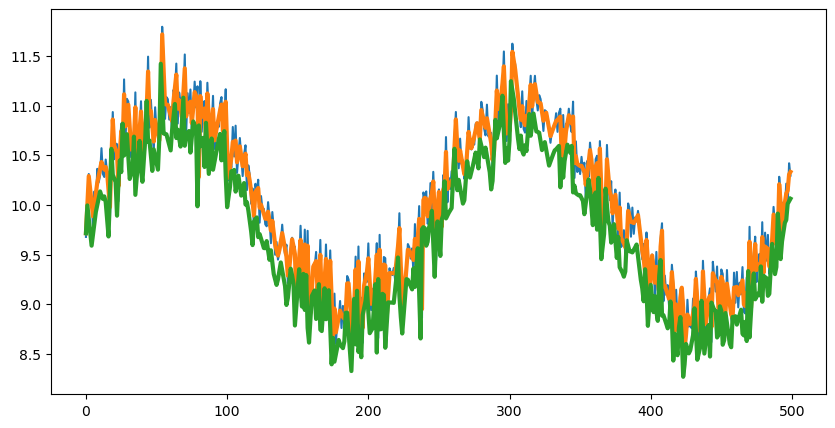

In [ ]:
x_equal=x

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(tf.y_hat, label="Adaptive TF",lw=3)
ax.plot(ctf.evaluate_tf(x_equal),label="Continous TF",lw=3)


### References

- The Falling Factorial Basis and Its Statistical Applications https://proceedings.mlr.press/v32/wange14.html
- Fast and Flexible ADMM Algorithms for Trend Filtering https://www.tandfonline.com/doi/full/10.1080/10618600.2015.1054033
